# Ananysis of Women’s E-commerce Clothing Reviews

## Import Libraries

In [1]:
!pip install -U textblob
!pip install vaderSentiment
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!pip install tabulate
!pip install spacy
!pip install imbalanced-learn

[nltk_data] Downloading package brown to /Users/s/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/s/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/s/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/s/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /Users/s/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
     |████████████████████████████████| 12.8 MB 9.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import spacy
import tabulate
import numpy as np
import pandas as pd
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import collections

[nltk_data] Downloading package vader_lexicon to /Users/s/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## EDA

In [3]:
data = pd.read_csv("/Users/s/Desktop/275 NATRL LANG PROCESS/Final project/Womens clothing/Womens Clothing E-Commerce Reviews.csv")

In [4]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
data.shape

(23486, 11)

In [6]:
data.drop(labels =['Unnamed: 0'],axis = 1,inplace = True)

In [7]:
# Rename Columns
data = data.rename(columns={'Clothing ID': 'Clothing_ID','Review Text': 'Review_Text','Recommended IND': 'Recommended_IND', 
                            'Positive Feedback Count': 'Positive_Feedback_Count', 'Division Name': 'Division_Name',
                            'Department Name': 'Department_Name', 'Class Name': 'Class_Name'})

In [8]:
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Text Processing

In [9]:
data_train = pd.DataFrame(data)

In [10]:
#Regular Expression
import re
def sentence_rge(data):
    data = re.sub('<[^>]*>','',str(data))
    data = re.sub('[\W]+',' ',data.lower())
    return data

data_train['Review_Text'] = data_train['Review_Text'].apply(sentence_rge)

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /Users/s/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
data_train['Review_Text'] = data_train['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

data_train.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses


## Bar Chart 

<AxesSubplot:xlabel='Rating'>

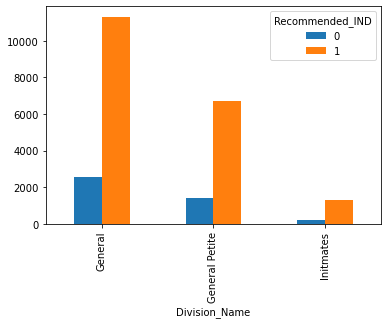

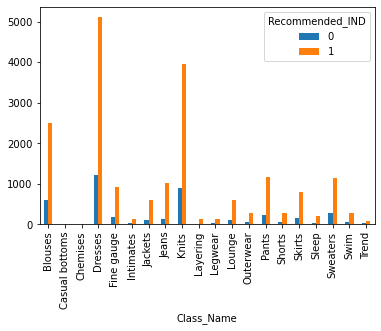

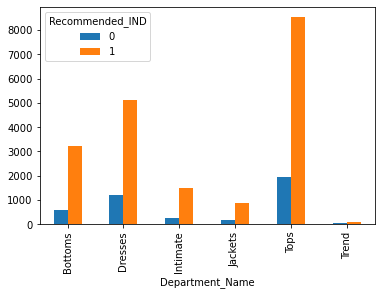

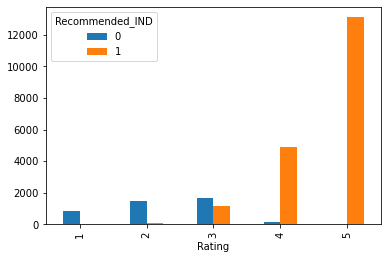

In [13]:
data_train.groupby(['Division_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
data_train.groupby(['Class_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
data_train.groupby(['Department_Name','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()
data_train.groupby(['Rating','Recommended_IND'])['Clothing_ID'].count().unstack('Recommended_IND').plot.bar()

## Apply Vader

In [14]:
vader = SentimentIntensityAnalyzer()

In [15]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [16]:
data_train.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses


In [17]:
data_train_1 = data_train.copy()
data_train_1['tb_polarity'] = data_train_1.Review_Text.apply(detect_tb_polarity)

vader = SentimentIntensityAnalyzer()
data_train_1['vader_comp'] = data_train_1.Review_Text.apply(detect_vader_comp)

In [18]:
data_train_1.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,tb_polarity,vader_comp
0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.8991
1,1080,34,NaN,love dress s sooo pretty happened find store m...,5,1,4,General,Dresses,Dresses,0.318750,0.9700
2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses,0.082300,0.9062
3,1049,50,My favorite buy!,love love love jumpsuit s fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants,0.500000,0.9464
4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.458333,0.9062


## WordCloud (Compound Score)

In [19]:
scores = data_train_1.vader_comp

In [20]:
Label = []
length = len(scores)
for i in range(length):
    Score = scores[i]
    if Score >= 0.05: # Positive Text
        Label.append(1)
    elif Score <= -0.05: # Negative Text
        Label.append(0)
    else:
        Label.append(2) # Neutral Text

In [21]:
data_modify = dict()
data_modify["Review_Text"] = data_train_1["Review_Text"]
data_modify["Label"] = Label
data_last = pd.DataFrame(data_modify)

In [22]:
data_last.drop(data_last[data_last['Label'] == 2].index, inplace = True)
data_last.head()

,Review_Text,Label
0,absolutely wonderful silky sexy comfortable,1
1,love dress s sooo pretty happened find store m...,1
2,high hopes dress really wanted work initially ...,1
3,love love love jumpsuit s fun flirty fabulous ...,1
4,shirt flattering due adjustable front tie perf...,1


In [23]:
print(data_last["Label"].value_counts())

1    21633
0      717
Name: Label, dtype: int64


In [24]:
stopwords.update(['nan', 'dress', 'shirt', 's', 'm', 'top', 'color', 'bought', 'look', 'ordered'])

Positive words are as follows


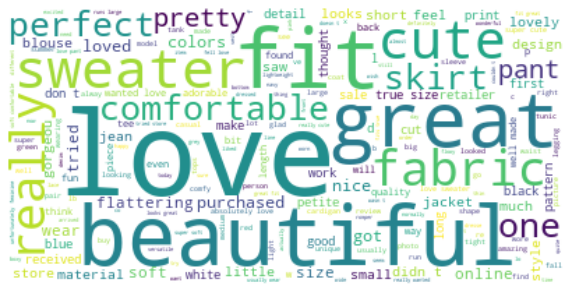

Negative words are as follows


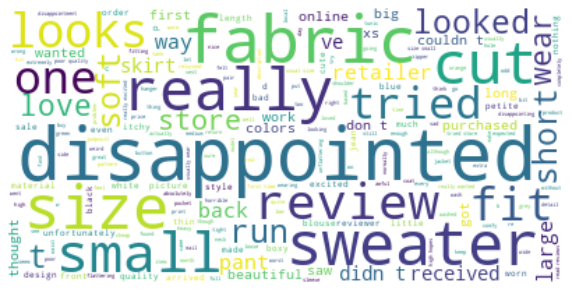

In [25]:
Positive_Data = data_last[data_last["Label"] == 1]
Positive_Data = Positive_Data["Review_Text"]
Negative_Data = data_last[data_last["Label"] == 0]
Negative_Data = Negative_Data["Review_Text"]

# Convert Data to String
Positive_Data_2 = Positive_Data.to_string()
Negative_Data_2 = Negative_Data.to_string()

print("Positive words are as follows")
Wordcloud_P = WordCloud(stopwords=stopwords, background_color='white').generate(Positive_Data_2)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show()


print("Negative words are as follows")
Wordcloud_N = WordCloud(stopwords=stopwords, background_color='white').generate(Negative_Data_2)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_N, interpolation='bilinear')
plt.axis("off")
plt.show()

## Predictive Modeling

In [26]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=None,use_idf=True,norm='l2',smooth_idf=True)
y_train=data_last.Label.values
x_train=tfidf.fit_transform(data_last.Review_Text)

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,random_state=30,test_size=0.3,shuffle=False)

In [28]:
print(Counter(Y_train))

Counter({1: 15160, 0: 485})


In [29]:
type(Y_train)

numpy.ndarray

In [30]:
sm = SMOTE(random_state = 2)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)

In [31]:
print(Counter(Y_train_sm))

Counter({1: 15160, 0: 15160})


In [57]:
#build a list of dictionariese of 5 models.
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state=0),
},
{
    'label': 'Naive Bayes',
    'model': MultinomialNB(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=13, random_state=0),
}   
]

In [58]:
#calculate Accuracy, Recall, F1-Score, Confusion Matrix
for n in models:
    model = n['model']
    model.fit(X_train_sm,Y_train_sm)
    Y_pred=model.predict(X_test)
    
    print('%s'%n['label'])
    print("Accuracy: "+str(accuracy_score(Y_test, Y_pred)))
    print("Recall: "+str(recall_score(Y_test, Y_pred, average="weighted")))
    print("F1-Score: "+str(f1_score(Y_test, Y_pred, average="weighted")))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))

Logistic Regression
Accuracy: 0.9574944071588367
Recall: 0.9574944071588367
F1-Score: 0.9620603113340621
Confusion Matrix
[[ 157   75]
 [ 210 6263]]
              precision    recall  f1-score   support

           0       0.43      0.68      0.52       232
           1       0.99      0.97      0.98      6473

    accuracy                           0.96      6705
   macro avg       0.71      0.82      0.75      6705
weighted avg       0.97      0.96      0.96      6705

Naive Bayes
Accuracy: 0.9205070842654736
Recall: 0.9205070842654736
F1-Score: 0.9363188308079675
Confusion Matrix
[[ 137   95]
 [ 438 6035]]
              precision    recall  f1-score   support

           0       0.24      0.59      0.34       232
           1       0.98      0.93      0.96      6473

    accuracy                           0.92      6705
   macro avg       0.61      0.76      0.65      6705
weighted avg       0.96      0.92      0.94      6705

Decision Tree
Accuracy: 0.9421327367636092
Recall: 0.942

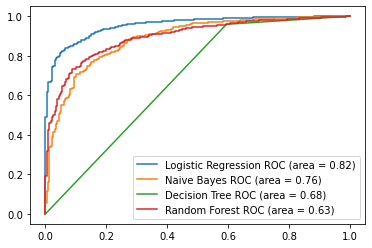

In [59]:
# plot ROC
plt.figure(0).clf()

for n in models:
    model = n['model']
    model.fit(X_train_sm,Y_train_sm)
    Y_pred=model.predict(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    
    auc = metrics.roc_auc_score(Y_test, model.predict(X_test))

    plt.plot(fpr, tpr, label='%s ROC (area = %.2f)' % (n['label'], auc))
    
plt.legend()